<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Metodo_Biseccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

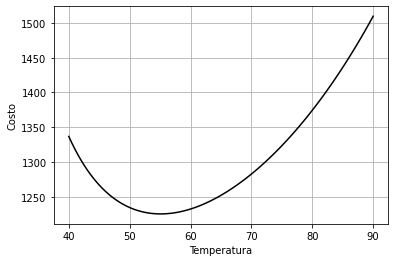

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

a=40
b=90
T=np.linspace(a,b,100)
U=(204165.5)/(330-2*T)+(10400)/(T-20)

plt.figure()
plt.plot(T,U,'k')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.grid()
plt.show()

In [ ]:
import sympy

def calcularGradiente():
  T=sympy.Symbol('T')
  fU=(204165.5)/(330-2*T)+(10400)/(T-20)
  d1fU=sympy.diff(fU)
  print(fU)
  print(d1fU)
  return None

calcularGradiente()


10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [ ]:
def U(T):
  return (204165.5)/(330-2*T)+(10400)/(T-20)
U(55.08)

1225.1656408350887

In [ ]:
def d1U(T):
  return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
d1U(55.08)

-0.0022423688924249063

In [ ]:
def biseccion():
  a=40
  b=90
  epsilon=0.001
  cont=0
  registro=[]

  while(True):
    alpha=(a+b)/2
    dU_a=d1U(a) #Primer derivada en a
    dU_alpha=d1U(alpha) #Primer derivada en alpha
    if(dU_a*dU_alpha<0):
      b=alpha
    else:
      a=alpha
    
    Ua=U(a)
    if(np.abs(a-b)<epsilon):
      print('-------------------------------------------')
      print("it: {:02} - Temp: {:.10f} - Costo: {:.10f}".format(cont, a, Ua))
      break

    cont=cont+1
    registro.append([cont, a, Ua])
    print("it: {:02} - Temp: {:.10f} - Costo: {:.10f}".format(cont, a, Ua))
  return registro

reg1=biseccion()

it: 01 - Temp: 40.0000000000 - Costo: 1336.6620000000
it: 02 - Temp: 52.5000000000 - Costo: 1227.4022222222
it: 03 - Temp: 52.5000000000 - Costo: 1227.4022222222
it: 04 - Temp: 52.5000000000 - Costo: 1227.4022222222
it: 05 - Temp: 54.0625000000 - Costo: 1225.5036361287
it: 06 - Temp: 54.8437500000 - Costo: 1225.1839888051
it: 07 - Temp: 54.8437500000 - Costo: 1225.1839888051
it: 08 - Temp: 55.0390625000 - Costo: 1225.1662656061
it: 09 - Temp: 55.0390625000 - Costo: 1225.1662656061
it: 10 - Temp: 55.0390625000 - Costo: 1225.1662656061
it: 11 - Temp: 55.0634765625 - Costo: 1225.1657646744
it: 12 - Temp: 55.0756835938 - Costo: 1225.1656564351
it: 13 - Temp: 55.0817871094 - Costo: 1225.1656378426
it: 14 - Temp: 55.0817871094 - Costo: 1225.1656378426
it: 15 - Temp: 55.0833129883 - Costo: 1225.1656368938
-------------------------------------------
it: 15 - Temp: 55.0833129883 - Costo: 1225.1656368938


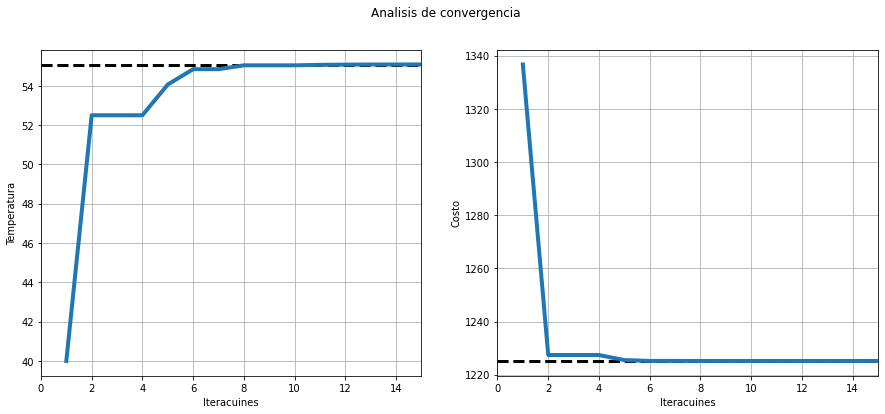

In [ ]:
def evaluacion(reg):
  reg=np.array(reg)
  fig, axs=plt.subplots(1, 2, figsize=(15, 6))

  fig.suptitle('Analisis de convergencia')
  axs[0].axhline(55.08, color='k', linewidth=3, linestyle='--')
  axs[0].plot(reg[:,0], reg[:,1], linewidth=4)
  axs[0].set_xlabel('Iteracuines')
  axs[0].set_ylabel('Temperatura')
  axs[0].grid()
  axs[0].set_xlim([0,15])
  
  fig.suptitle('Analisis de convergencia')
  axs[1].axhline(1225.17, color='k', linewidth=3, linestyle='--')
  axs[1].plot(reg[:,0], reg[:,2], linewidth=4)
  axs[1].set_xlabel('Iteracuines')
  axs[1].set_ylabel('Costo')
  axs[1].grid()
  axs[1].set_xlim([0,15])

  plt.show()

evaluacion(reg1)